In [1]:
# 라이브러리 설치
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import datetime as dt

# 한글 폰트 사용
font_path = "C:\Windows\Fonts\Hancom Gothic Bold.ttf"  # 경로 확인 후 변경 필요
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

<>:9: SyntaxWarning: invalid escape sequence '\W'
<>:9: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_19368\1702169824.py:9: SyntaxWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\Hancom Gothic Bold.ttf"  # 경로 확인 후 변경 필요


In [5]:
total_df = pd.read_excel("Stack_Store_Price.xlsx")
total_df

,Time,itemName,unitPrice
0,2025-01-17 13:02,무색 큐브 조각,46
1,2025-01-17 13:02,모순의 결정체,47269
2,2025-01-17 13:02,레어 소울 결정,141041
3,2025-01-17 13:02,유니크 소울 결정,403637
4,2025-01-17 13:02,레전더리 소울 결정,2210479
...,...,...,...
302,2025-02-25 13:14,레어 소울 결정,82785
303,2025-02-25 13:14,유니크 소울 결정,254586
304,2025-02-25 13:14,레전더리 소울 결정,1342073
305,2025-02-25 13:14,에픽 소울 결정,4360516


In [6]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       307 non-null    object
 1   itemName   307 non-null    object
 2   unitPrice  307 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.3+ KB


In [11]:
# 원본 데이터 백업
store_df = total_df.copy()

# 데이터 아이템 이름으로 그룹핑
store_df['Time'] = pd.to_datetime(store_df['Time']).dt.date
store_df = pd.pivot_table(data=store_df, 
               index='Time', 
               columns = 'itemName', 
               values='unitPrice',
               aggfunc= 'mean').reset_index()
store_df.rename(columns= {'Time' : 'date'}, inplace = True)
store_df

itemName,date,레어 소울 결정,레전더리 소울 결정,모순의 결정체,무색 큐브 조각,에픽 소울 결정,유니크 소울 결정,태초 소울 결정
0,2025-01-17,141041.000000,2210479.0,47269.000000,46.000000,8.741103e+06,403637.0,NaN
1,2025-01-18,168060.000000,2322732.0,51457.000000,49.000000,7.932722e+06,508080.0,NaN
2,2025-01-20,169282.000000,2643067.0,50172.000000,48.000000,8.016844e+06,402608.0,NaN
3,2025-01-21,193974.000000,2859111.0,54466.000000,52.000000,9.462087e+06,488182.0,NaN
4,2025-01-22,176483.000000,3068275.0,52005.000000,50.000000,9.670980e+06,477167.0,NaN
5,2025-01-23,141907.000000,2528344.0,52076.000000,48.000000,8.858931e+06,351769.0,NaN
6,2025-01-24,144796.000000,2211168.0,45418.000000,43.000000,7.885026e+06,345318.0,NaN
7,2025-01-26,144583.500000,2378770.0,43901.000000,42.000000,8.115254e+06,399694.0,8.392629e+07
8,2025-01-27,147501.000000,2405232.0,41591.000000,41.000000,7.807929e+06,365565.0,8.400239e+07
9,2025-01-29,147756.000000,2357291.0,40532.000000,38.000000,7.341711e+06,349295.0,8.312330e+07


In [39]:
# 결측된 시계열 데이터의 처리를 위해 17일부터 현재까지 데이터 칼럼 생성
date_df = pd.DataFrame(columns = ['date'])
date_df['date'] = pd.date_range('2025-01-17', f'{dt.datetime.now()}')
date_df['date'] = date_df['date'].dt.date

# 결측된 시계열 데이터 데이터 삽입(내삽)
df_merge = pd.merge(date_df, store_df, on='date', how='left')
df = df_merge.interpolate()

df

C:\Users\user\AppData\Local\Temp\ipykernel_19368\3698899015.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df_merge.interpolate()


,date,레어 소울 결정,레전더리 소울 결정,모순의 결정체,무색 큐브 조각,에픽 소울 결정,유니크 소울 결정,태초 소울 결정
0,2025-01-17,141041.000000,2210479.00,47269.000000,46.000000,8.741103e+06,403637.00,NaN
1,2025-01-18,168060.000000,2322732.00,51457.000000,49.000000,7.932722e+06,508080.00,NaN
2,2025-01-19,168671.000000,2482899.50,50814.500000,48.500000,7.974783e+06,455344.00,NaN
3,2025-01-20,169282.000000,2643067.00,50172.000000,48.000000,8.016844e+06,402608.00,NaN
4,2025-01-21,193974.000000,2859111.00,54466.000000,52.000000,9.462087e+06,488182.00,NaN
5,2025-01-22,176483.000000,3068275.00,52005.000000,50.000000,9.670980e+06,477167.00,NaN
6,2025-01-23,141907.000000,2528344.00,52076.000000,48.000000,8.858931e+06,351769.00,NaN
7,2025-01-24,144796.000000,2211168.00,45418.000000,43.000000,7.885026e+06,345318.00,NaN
8,2025-01-25,144689.750000,2294969.00,44659.500000,42.500000,8.000140e+06,372506.00,NaN
9,2025-01-26,144583.500000,2378770.00,43901.000000,42.000000,8.115254e+06,399694.00,8.392629e+07


In [46]:
col_index = ['무색 큐브 조각', '모순의 결정체', '레어 소울 결정', '유니크 소울 결정', '레전더리 소울 결정', '에픽 소울 결정','태초 소울 결정']

df = df.dropna().set_index('date')
df[col_index] = df[col_index].astype(int)

df.to_csv('던파 경매장 데이터 ~250225.csv', encoding = 'euc-kr')

KeyError: "None of ['date'] are in the columns"

In [47]:
df.to_csv('던파 경매장 데이터 ~250225.csv', encoding = 'euc-kr')

In [48]:
df

,레어 소울 결정,레전더리 소울 결정,모순의 결정체,무색 큐브 조각,에픽 소울 결정,유니크 소울 결정,태초 소울 결정
date,,,,,,,
2025-01-26,144583,2378770,43901,42,8115254,399694,83926292
2025-01-27,147501,2405232,41591,41,7807929,365565,84002391
2025-01-28,147628,2381261,41061,39,7574820,357430,83562845
2025-01-29,147756,2357291,40532,38,7341711,349295,83123299
2025-01-30,137464,2133500,40900,39,6826463,322031,75392526
2025-01-31,127172,1909710,41268,40,6311216,294767,67661753
2025-02-01,125760,1941879,41341,40,6324434,307438,67763628
2025-02-02,124348,1974048,41414,40,6337653,320110,67865504
2025-02-03,128969,1942105,42374,41,6228128,321325,71165044


In [ ]:
# seaborn 시각화를 위한 데이터 멜팅
df_melt = df.melt(id_vars='date')
df_melt['date'] = pd.to_datetime(df_melt['date'])
df_melt

,date,variable,value
0,2025-01-26,레어 소울 결정,144583
1,2025-01-27,레어 소울 결정,147501
2,2025-01-28,레어 소울 결정,147628
3,2025-01-29,레어 소울 결정,147756
4,2025-01-30,레어 소울 결정,137464
...,...,...,...
212,2025-02-21,태초 소울 결정,48365110
213,2025-02-22,태초 소울 결정,44949713
214,2025-02-23,태초 소울 결정,46037655
215,2025-02-24,태초 소울 결정,47427373


In [42]:
col_index = ['무색 큐브 조각', '모순의 결정체', '레어 소울 결정', '유니크 소울 결정', '레전더리 소울 결정', '에픽 소울 결정','태초 소울 결정']

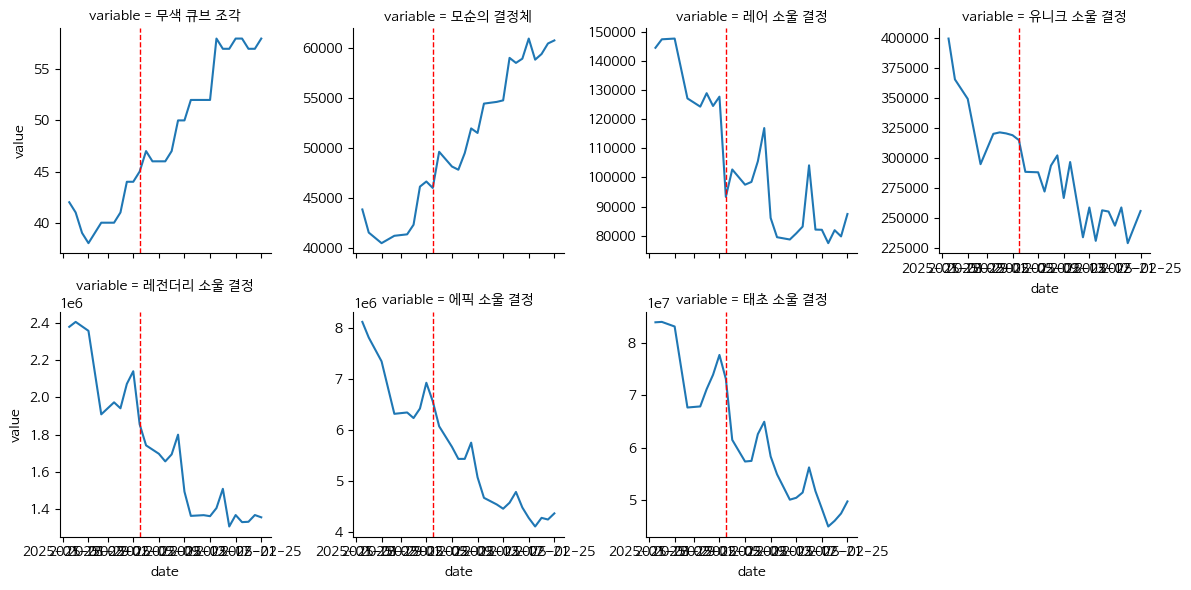

In [43]:
g = sns.FacetGrid(df_melt, col='variable', col_wrap=4, sharey=False, col_order=col_index)
highlight_date = pd.to_datetime('2025-02-06')
g.map(sns.lineplot, "date", "value")
for ax in g.axes.flat:
    ax.axvline(highlight_date, color='red', linestyle='--', linewidth = 1)
plt.show()